# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

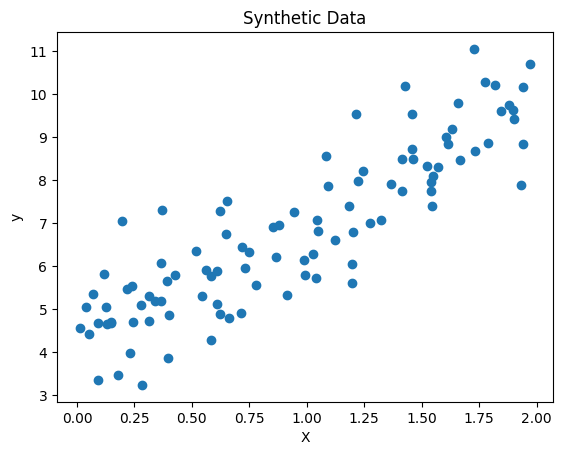

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

## Do Train-Test Split (75%-25%)

In [140]:
# test_size=0.25, 25% of data for testing and remaining for training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Do the Linear Regression with Scikit-Learn Library

In [141]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred_lin=reg_lin.predict(X_test)

In [142]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred_lin)
r2=r2_score(y_test,y_pred_lin)
print("Mean Absolute Percentage Error :",mape)
print(" R2 Score :",r2)

Mean Absolute Percentage Error : 0.08475682819153892
 R2 Score : 0.8310990846073661


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

**RIDGE**

In [143]:
from sklearn.linear_model import Ridge,Lasso
reg_ridge=Ridge(alpha=0.1)
reg_ridge.fit(X_train,y_train)
y_pred_ridge=reg_ridge.predict(X_test)

In [144]:
mape_ridge=mean_absolute_percentage_error(y_test,y_pred_ridge)
r2_ridge=r2_score(y_test,y_pred_ridge)
print("Mean Absolute Percentage Error :",mape_ridge)
print(" R2 Score :",r2_ridge)

Mean Absolute Percentage Error : 0.08451338266857177
 R2 Score : 0.8306977946096742


**LASSO**

In [145]:
from sklearn.linear_model import Ridge,Lasso
reg_lasso=Lasso(alpha=0.1)
reg_lasso.fit(X_train,y_train)
y_pred_lasso=reg_lasso.predict(X_test)

In [146]:
mape_lasso=mean_absolute_percentage_error(y_test,y_pred_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print("Mean Absolute Percentage Error :",mape_lasso)
print(" R2 Score :",r2_lasso)

Mean Absolute Percentage Error : 0.08264002206148635
 R2 Score : 0.8090816688640925


In [147]:
import pandas as pd
result_df=pd.DataFrame(columns=["Model","Metrics","Value"])
result_df.loc[len(result_df)] = ['Ridge Regression',"MAPE",mape_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"MAPE",mape_lasso]
result_df.loc[len(result_df)] = ['Ridge Regression',"R2",r2_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"R2",r2_lasso]
result_df

,Model,Metrics,Value
0,Ridge Regression,MAPE,0.084513
1,Lasso Regression,MAPE,0.082640
2,Ridge Regression,R2,0.830698
3,Lasso Regression,R2,0.809082


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

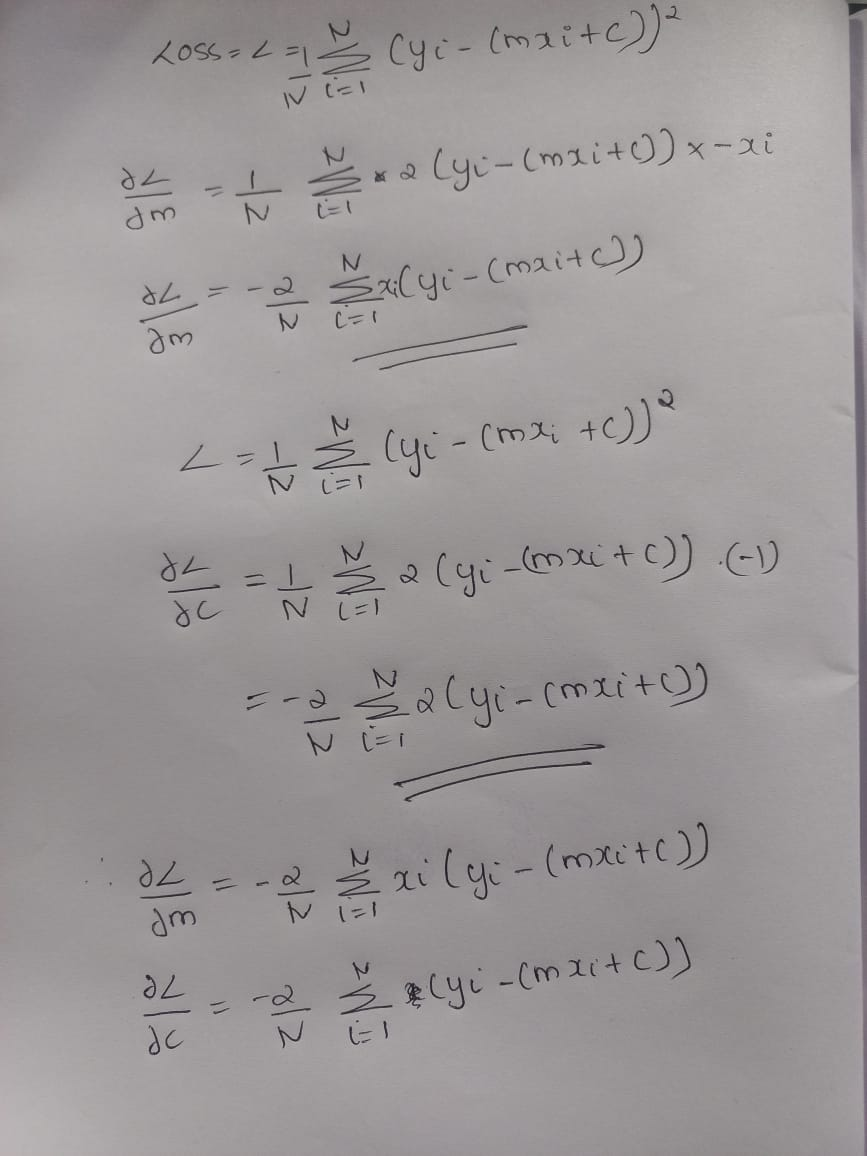

## 🧠 Custom Linear Regression Class

In [148]:
import numpy as np
import matplotlib.pyplot as plt

class MyLinearRegression:
    def __init__(self):
        self.m = None
        self.c = None
        self.coef_ = None
        self.loss_history = []  # To store loss at each iteration

    def fit(self, X, y, lr=0.01, n_iters=1000):
        X = np.array(X)
        y = np.array(y)
        N = len(X)

        self.m = 0
        self.c = 0

        for _ in range(n_iters):
            y_pred = self.m * X + self.c
            error = y - y_pred

            # Compute loss (MSE)
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)

            # Compute gradients
            dm = (-2 / N) * np.sum(X * error)
            dc = (-2 / N) * np.sum(error)

            # Update parameters
            self.m -= lr * dm
            self.c -= lr * dc

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        X = np.array(X)
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

    def plot_loss(self):
        plt.plot(self.loss_history)
        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error (Loss)")
        plt.title("Loss Curve")
        plt.grid(True)
        plt.show()

## 🔁 Train the Model and Visualize the Fit

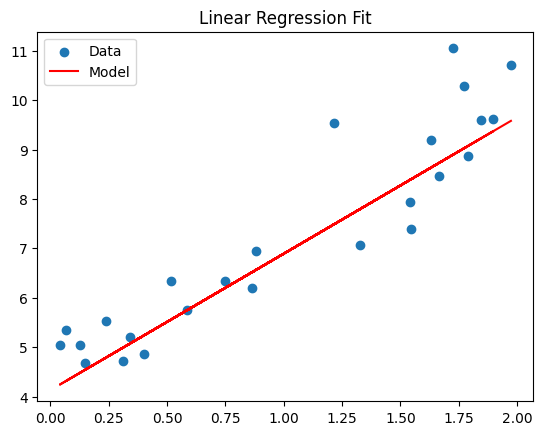

Learned coefficients (m, c): (np.float64(2.760287211333097), np.float64(4.131338540026423))


In [149]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)

## 📉 Plot the Loss Curve

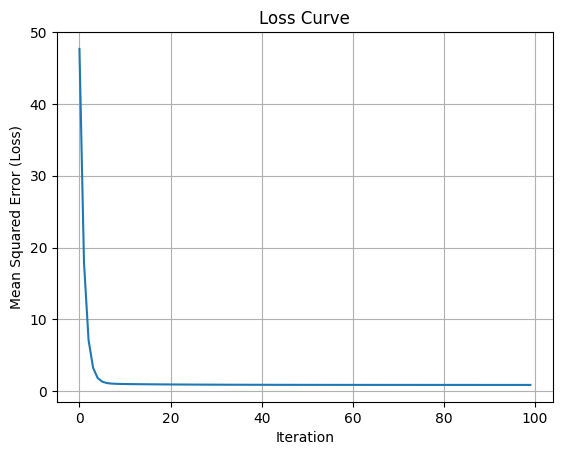

In [150]:
model.plot_loss()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [151]:
import numpy as np

class MyLinearRegressionSGD:
    def __init__(self):
        self.m = None  # slope
        self.c = None  # intercept
        self.coef_ = None  # (m, c)
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_epochs=50):
        X = np.array(X)
        y = np.array(y)
        N = len(X)

        # Initialize parameters
        self.m = 0
        self.c = 0

        for epoch in range(n_epochs):
            total_loss = 0

            # Shuffle the data each epoch (important in SGD)
            indices = np.random.permutation(N)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for xi, yi in zip(X_shuffled, y_shuffled):
                xi = xi[0] if xi.ndim > 0 else xi  # Handle 2D input
                y_pred = self.m * xi + self.c
                error = yi - y_pred

                # Gradients
                dm = -2 * xi * error
                dc = -2 * error

                # Update weights
                self.m -= lr * dm
                self.c -= lr * dc

                # Track loss (optional)
                total_loss += error ** 2

            self.loss_history.append(total_loss / N)

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        X = np.array(X)
        return (self.m * X + self.c).reshape(-1, 1)

    def plot_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.loss_history)
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title("Loss Curve (SGD)")
        plt.grid(True)
        plt.show()

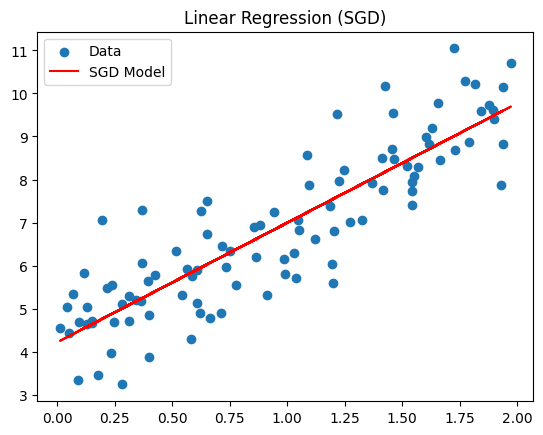

Learned parameters (m, c): (array([2.77237672]), array([4.22230288]))


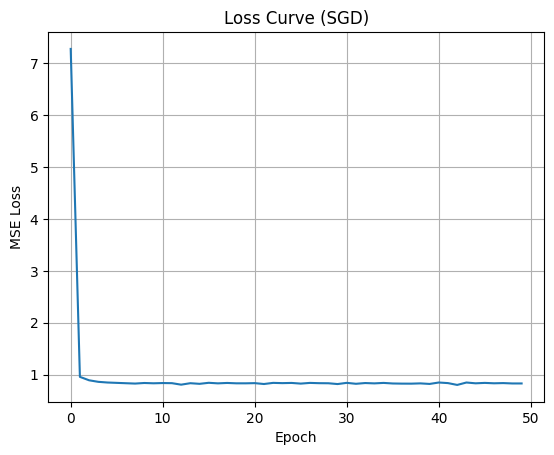

In [152]:
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X, y, lr=0.01, n_epochs=50)

y_pred_sgd= model_sgd.predict(X)

import matplotlib.pyplot as plt
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_sgd, color="red", label="SGD Model")
plt.legend()
plt.title("Linear Regression (SGD)")
plt.show()

print("Learned parameters (m, c):", model_sgd.coef_)

model_sgd.plot_loss()

#Loss Curve Comparison

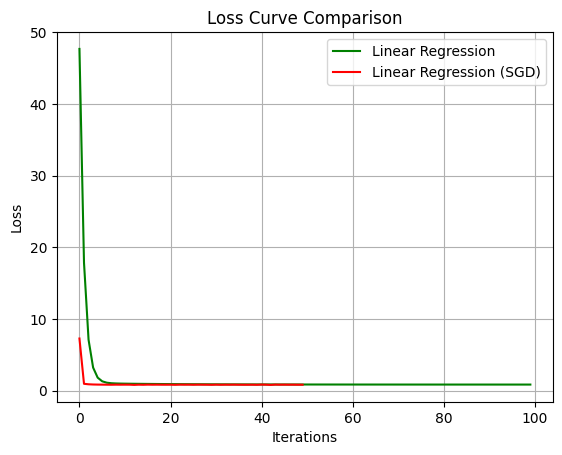

In [155]:
plt.plot(model.loss_history, label="Linear Regression", color="green")
plt.plot(model_sgd.loss_history, label="Linear Regression (SGD)" ,color="red")
# plt.xlim(0,10)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

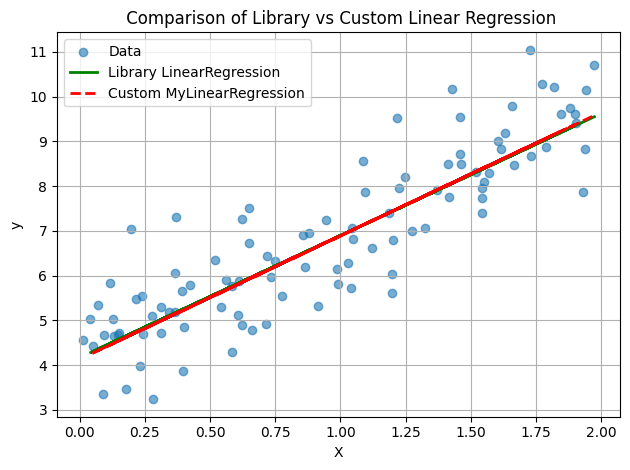

In [154]:
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X_test,y_pred_lin , color="green", label="Library LinearRegression", linewidth=2)
plt.plot(X_test,y_pred, color="red", linestyle="--", label="Custom MyLinearRegression", linewidth=2)
plt.title(" Comparison of Library vs Custom Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()